In [ ]:
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
import seaborn as sb

In [ ]:
PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / "data/weatherstations/ACIS/TDD/tdd_cumul_bystation"


### Helper functions

In [ ]:
def datestr2dayssince(datestr, since='0301'):
    thedate = dt.datetime.strptime(datestr, '%Y-%m-%d').date()
    since_mth = int(since[:2])
    since_day = int(since[3:])
    since_date = dt.date(thedate.year, since_mth, since_day)
    return (thedate - since_date).days

In [ ]:
def dayssince2date(days, year, since='0301'):
    since_date = dt.datetime.strptime(f"{year}{since}", "%Y%m%d").date()
    return (since_date + dt.timedelta(days=days))

In [ ]:
dayssince2date(43, 2022)

datetime.date(2022, 4, 13)

### Load data

In [ ]:
breakuppth = breakupdata / "breakupDate_cleaned.csv"
breakup = pd.read_csv(breakuppth, header=3, index_col=0)
breakup 

,id,siteID,year,breakup
0,7175,Koyukuk River at Bettles,2022,2022-05-05
1,7173,Kobuk River at Shungnak,2022,2022-05-20
2,7172,Buckland River at Buckland,2022,2022-05-21
3,7171,Yukon River at Mountain Village,2022,2022-05-10
4,7170,Yukon River at Marshall,2022,2022-05-15
...,...,...,...,...
1490,213,Buckland River at Buckland,1988,1988-05-05
1491,212,Buckland River at Buckland,1987,1987-05-22
1492,211,Buckland River at Buckland,1986,1986-05-30
1493,210,Buckland River at Buckland,1984,1984-05-23


### Prototyping: one location only

In [ ]:
location = "Yukon River at Eagle"
breakup = breakup[breakup.siteID == location].sort_values(by='year').reset_index(drop=True)
breakup['days_since_march1'] = breakup.apply(lambda row: datestr2dayssince(row.breakup), axis=1)
breakup

,id,siteID,year,breakup,days_since_march1
0,5330,Yukon River at Eagle,1980,1980-05-03,63
1,5331,Yukon River at Eagle,1981,1981-05-07,67
2,5332,Yukon River at Eagle,1982,1982-05-14,74
3,5333,Yukon River at Eagle,1983,1983-05-02,62
4,5334,Yukon River at Eagle,1984,1984-05-09,69
5,5335,Yukon River at Eagle,1985,1985-05-16,76
6,5336,Yukon River at Eagle,1986,1986-05-11,71
7,5337,Yukon River at Eagle,1987,1987-05-09,69
8,5338,Yukon River at Eagle,1988,1988-05-02,62
9,5339,Yukon River at Eagle,1989,1989-04-29,59


In [ ]:
stationdata

PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation')

In [ ]:
tdd = sorted(list(stationdata.glob("*.csv")))
tdd

[PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/ALYESKA_yearly_TDD_cumul.csv'),
 PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/ANCHORAGE_MERRILL_FIELD_yearly_TDD_cumul.csv'),
 PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT_yearly_TDD_cumul.csv'),
 PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/AUKE_BAY_yearly_TDD_cumul.csv'),
 PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/BARROW_AIRPORT_yearly_TDD_cumul.csv'),
 PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/BETHEL_AIRPORT_yearly_TDD_cumul.csv'),
 PosixPath('/Users/chris/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation/BETTLES_AIRPORT_yearly_TDD_cumul.csv'),
 PosixPath('/Us

In [ ]:
teststationDF = pd.read_csv(tdd[0], skiprows=4, index_col=0)
teststationDF

,1982,1983,1984,1985,1986,1987,1988,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.0,5.5,0.0,2.50,0.00,...,1.0,2.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.00,0.00,0.00,0.00,0.00,0.0,10.0,0.0,2.50,0.00,...,3.0,3.5,3.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.00,0.00,0.00,0.00,0.00,0.0,10.5,3.0,2.50,0.00,...,5.0,3.5,7.5,9.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.00,0.00,4.00,0.00,0.00,0.0,12.0,5.0,2.50,0.00,...,7.5,3.5,11.5,9.0,0.0,0.0,0.5,0.0,0.0,10.5
4,0.00,0.50,10.50,0.00,0.00,0.0,12.0,5.0,2.50,0.00,...,9.0,4.5,18.0,9.0,0.0,0.0,0.5,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,893.83,960.44,1093.63,823.04,1011.52,1030.0,1078.5,1286.5,1056.81,1093.19,...,1028.0,1301.0,1542.0,1667.5,1224.0,1171.0,1485.5,1289.0,1188.0,1406.5
118,922.83,981.94,1112.13,842.04,1033.52,1046.5,1094.5,1309.0,1084.81,1110.19,...,1060.0,1319.5,1567.0,1692.0,1247.5,1192.0,1517.0,1309.5,1208.5,1432.0
119,948.83,1000.44,1127.13,867.54,1062.52,1063.5,1112.5,1336.0,1110.81,1134.19,...,1091.0,1339.5,1590.5,1718.5,1269.0,1213.0,1551.0,1336.5,1235.0,1459.0


In [ ]:
def retrieve_tdd(row, stationDF):
    try:
        return stationDF.iloc[row.days_since_march1][str(row.year)]
    except KeyError:
        return np.nan

In [ ]:
for pth in tdd:
    stationname = pth.stem[:-17]
    teststationDF = pd.read_csv(pth, skiprows=4, index_col=0)
    breakup[stationname] = breakup.apply(
        lambda row: retrieve_tdd(row, teststationDF), axis=1)

In [ ]:
breakup

,id,siteID,year,breakup,days_since_march1,ALYESKA,ANCHORAGE_MERRILL_FIELD,ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT,AUKE_BAY,BARROW_AIRPORT,...,NENANA_MUN_AP,NOME_AIRPORT,NORTHWAY_AIRPORT,NORTH_POLE,SAINT_PAUL_ISLAND_AIRPORT,SITKA_AIRPORT,SKAGWAY_AIRPORT,TALKEETNA_AIRPORT,TANANA_AIRPORT,YAKUTAT_AIRPORT
0,5330,Yukon River at Eagle,1980,1980-05-03,63,NaN,NaN,288.0,449.01,0.0,...,NaN,23.0,123.00,177.11,104.0,610.00,NaN,218.0,102.50,426.0
1,5331,Yukon River at Eagle,1981,1981-05-07,67,NaN,NaN,311.5,599.50,3.0,...,NaN,34.5,161.00,231.98,157.5,726.50,NaN,207.5,149.50,512.5
2,5332,Yukon River at Eagle,1982,1982-05-14,74,193.11,NaN,267.5,399.00,0.0,...,NaN,39.0,124.50,181.00,122.0,529.00,494.50,217.0,100.00,219.5
3,5333,Yukon River at Eagle,1983,1983-05-02,62,230.00,NaN,218.5,502.69,0.0,...,NaN,32.5,134.00,127.50,97.5,639.00,511.00,153.5,120.00,344.0
4,5334,Yukon River at Eagle,1984,1984-05-09,69,294.11,NaN,478.5,745.00,0.0,...,121.50,21.0,153.00,141.00,11.5,818.50,710.00,277.5,56.74,452.0
5,5335,Yukon River at Eagle,1985,1985-05-16,76,208.54,NaN,242.5,444.50,0.0,...,NaN,2.0,NaN,133.00,31.0,587.50,576.00,134.0,108.50,254.0
6,5336,Yukon River at Eagle,1986,1986-05-11,71,188.02,NaN,232.0,498.68,0.0,...,NaN,11.0,85.00,142.21,85.5,561.50,488.98,184.5,109.00,300.5
7,5337,Yukon River at Eagle,1987,1987-05-09,69,281.50,NaN,353.0,563.00,0.0,...,NaN,35.5,131.50,222.00,98.5,693.00,NaN,268.0,167.00,364.5
8,5338,Yukon River at Eagle,1988,1988-05-02,62,180.00,NaN,214.0,513.00,0.0,...,NaN,50.0,105.00,225.50,7.0,548.00,482.00,174.0,174.00,319.5
9,5339,Yukon River at Eagle,1989,1989-04-29,59,NaN,NaN,223.0,411.61,0.0,...,NaN,1.0,145.50,154.50,118.0,519.50,462.00,156.5,76.50,229.0


In [ ]:
breakup_only = breakup[breakup.columns[4:]]
breakup_standardized = ((breakup_only - breakup_only.mean())/breakup_only.std())
breakup_standardized

,days_since_march1,ALYESKA,ANCHORAGE_MERRILL_FIELD,ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT,AUKE_BAY,BARROW_AIRPORT,BETHEL_AIRPORT,BETTLES_AIRPORT,BIG_DELTA_AIRPORT,CHICKEN,...,NENANA_MUN_AP,NOME_AIRPORT,NORTHWAY_AIRPORT,NORTH_POLE,SAINT_PAUL_ISLAND_AIRPORT,SITKA_AIRPORT,SKAGWAY_AIRPORT,TALKEETNA_AIRPORT,TANANA_AIRPORT,YAKUTAT_AIRPORT
0,-0.288825,NaN,NaN,0.229918,-0.260314,-0.291347,-0.397537,-0.466491,1.658549,NaN,...,NaN,-0.303351,-0.026767,-0.051254,0.566025,0.320467,NaN,-0.088826,-0.336239,1.226969
1,0.391694,NaN,NaN,0.562296,1.516027,3.664840,0.782512,0.086585,1.452155,NaN,...,NaN,0.124020,1.082261,1.008235,1.495349,1.533602,NaN,-0.281176,0.725517,2.196116
2,1.582603,-0.896403,NaN,-0.060029,-0.850618,-0.291347,-0.272884,-0.601387,-0.405394,NaN,...,NaN,0.291251,0.017011,0.023858,0.878695,-0.523001,0.123265,-0.107145,-0.392715,-1.086659
3,-0.458955,-0.292036,NaN,-0.753072,0.373309,-0.291347,-1.195316,0.302419,-0.564880,NaN,...,NaN,0.049694,0.294268,-1.009177,0.453117,0.622449,0.297137,-1.270404,0.059096,0.308241
4,0.731954,0.758274,NaN,2.924302,3.233467,-0.291347,-0.596982,-1.019567,-0.283434,NaN,...,-0.837741,-0.377676,0.848781,-0.748505,-1.040749,2.491614,2.394134,1.001157,-1.369982,1.518274
5,1.922863,-0.643614,NaN,-0.413622,-0.313549,-0.291347,-1.502793,0.032626,-1.381076,NaN,...,NaN,-1.083767,NaN,-0.902977,-0.702024,0.086170,0.982086,-1.627625,-0.200695,-0.700120
6,1.072214,-0.979792,NaN,-0.562132,0.325976,-0.291347,-0.439088,0.167523,-1.484273,NaN,...,NaN,-0.749303,-1.135795,-0.725141,0.244670,-0.184572,0.065097,-0.702514,-0.189400,-0.179134
7,0.731954,0.551685,NaN,1.149262,1.085191,-0.291347,-0.148231,0.666640,0.542143,NaN,...,NaN,0.161182,0.221305,0.815531,0.470487,1.184760,NaN,0.827126,1.120851,0.537923
8,-0.458955,-1.111183,NaN,-0.816719,0.495006,-0.291347,-0.331055,1.071329,0.645341,NaN,...,NaN,0.700041,-0.552096,0.883112,-1.118917,-0.325150,-0.008456,-0.894864,1.278985,0.033742
9,-0.969344,NaN,NaN,-0.689425,-0.701773,-0.291347,-1.178696,-0.709305,-0.302197,NaN,...,NaN,-1.120929,0.629894,-0.487832,0.809213,-0.621926,-0.219209,-1.215447,-0.923593,-0.980221


In [ ]:
from scipy.stats import pearsonr

In [ ]:
breakup_standardized[breakup_standardized.columns[1:]].corrwith(breakup_standardized['days_since_march1'],
                method=lambda x, y: pearsonr(x, y)[0])

ALYESKA                                        0.010366
ANCHORAGE_MERRILL_FIELD                        0.258686
ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT    0.173577
AUKE_BAY                                       0.272472
BARROW_AIRPORT                                 0.020684
BETHEL_AIRPORT                                -0.134552
BETTLES_AIRPORT                               -0.074010
BIG_DELTA_AIRPORT                             -0.348413
CHICKEN                                        0.238315
COLD_BAY_AIRPORT                               0.223314
COLLEGE_OBSERVATORY                           -0.156886
CORDOVA_AIRPORT                               -0.083399
DUTCH_HARBOR                                   0.391051
EAGLE                                          0.142894
FAIRBANKS_INTL_AP                             -0.140166
GULKANA_AIRPORT                               -0.031684
HAINES_AIRPORT                                 0.105072
HOMER_AIRPORT                                  0

In [ ]:
np.eye(len(breakup_standardized.columns)-1)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
breakup_standardized[breakup_standardized.columns[1:]].corrwith(breakup_standardized['days_since_march1'],
            method=lambda x, y: pearsonr(x, y)[1])

ALYESKA                                        0.950062
ANCHORAGE_MERRILL_FIELD                        0.211813
ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT    0.265642
AUKE_BAY                                       0.080858
BARROW_AIRPORT                                 0.895261
BETHEL_AIRPORT                                 0.389658
BETTLES_AIRPORT                                0.637166
BIG_DELTA_AIRPORT                              0.029730
CHICKEN                                        0.251300
COLD_BAY_AIRPORT                               0.150018
COLLEGE_OBSERVATORY                            0.327296
CORDOVA_AIRPORT                                0.594938
DUTCH_HARBOR                                   0.043702
EAGLE                                          0.379072
FAIRBANKS_INTL_AP                              0.369993
GULKANA_AIRPORT                                0.842114
HAINES_AIRPORT                                 0.541943
HOMER_AIRPORT                                  0

<AxesSubplot: xlabel='days_since_march1', ylabel='EAGLE'>

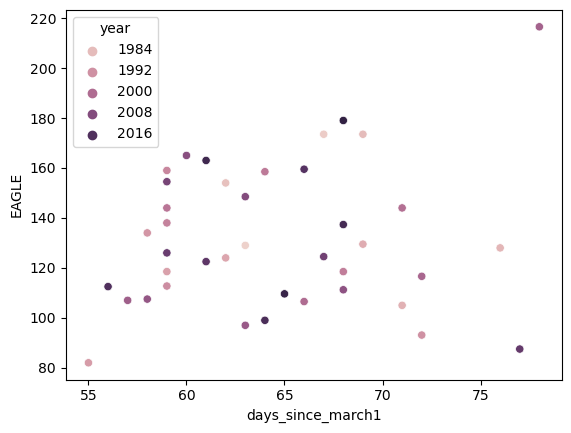

In [ ]:
sb.scatterplot(data=breakup, x='days_since_march1', y='EAGLE', hue='year')

<AxesSubplot: xlabel='days_since_march1', ylabel='AUKE_BAY'>

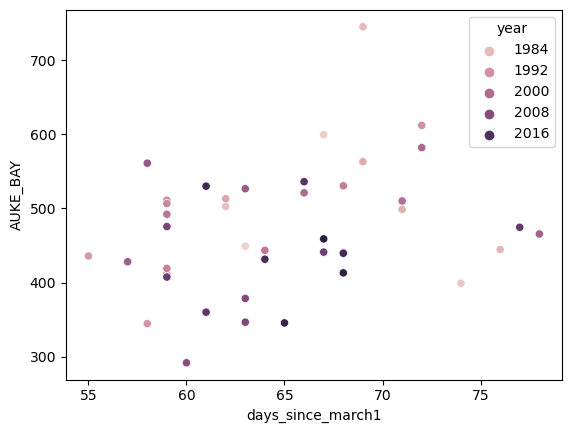

In [ ]:
sb.scatterplot(data=breakup, x='days_since_march1', y='AUKE_BAY', hue='year')

In [ ]:
breakup[breakup.columns[5:]].apply(lambda col: col.std())

ALYESKA                                         61.039128
ANCHORAGE_MERRILL_FIELD                         74.590142
ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT     70.702628
AUKE_BAY                                        84.719093
BARROW_AIRPORT                                   0.758306
BETHEL_AIRPORT                                  60.167023
BETTLES_AIRPORT                                 37.065456
BIG_DELTA_AIRPORT                               53.296050
CHICKEN                                         30.029919
COLD_BAY_AIRPORT                                91.894655
COLLEGE_OBSERVATORY                             47.352031
CORDOVA_AIRPORT                                 88.965637
DUTCH_HARBOR                                   103.370412
EAGLE                                           28.700792
FAIRBANKS_INTL_AP                               49.586803
GULKANA_AIRPORT                                 39.545138
HAINES_AIRPORT                                  93.352812
HOMER_AIRPORT 

In [ ]:
with open(outpath / "breakupDate_cleaned.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv\n")
    dst.write("# Only sites with more than 30 data points since 1980\n")
    dst.write("# \n")
    breakup_clean.to_csv(dst)    